In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_hypertension = pd.read_csv("toy_data_hypertension.csv")

print("Hypertension Dataset:")
display(df_hypertension.head())


Hypertension Dataset:


,index,Systolic.blood.pressure..automated.reading.0.0,Systolic.blood.pressure..automated.reading.0.1,Systolic.blood.pressure..automated.reading.1.0,Systolic.blood.pressure..automated.reading.1.1,Systolic.blood.pressure..automated.reading.2.0,Systolic.blood.pressure..automated.reading.2.1,Systolic.blood.pressure..automated.reading.3.0,Systolic.blood.pressure..automated.reading.3.1,Leg.pain.when.standing.still.or.sitting.0.0,...,VSIR,IPCEF1,MARCO,THY1,IL1R2,ADA,BST1,HSPB1,MME,SOD1
0,1975128,155.0,153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.03345,0.9998,0.03285,-0.56685,-0.0486,0.07295,-0.0065,0.07875,0.19725,0.2232
1,2068261,154.0,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.06560,1.1622,-0.25930,0.05775,0.1940,0.21220,0.1983,0.55215,0.93355,0.4733
2,4348144,166.0,155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.17570,-0.5354,-0.04730,-0.33255,0.0085,0.90870,0.0390,-1.37925,0.40055,0.0144
3,1337630,151.0,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.15170,0.0000,-0.23730,-0.05625,-0.2084,0.45950,0.2812,0.54505,-0.61105,0.8484
4,1912042,151.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.36125,-0.1101,0.16830,0.43330,-0.0025,0.00000,0.2315,-0.08520,0.20830,-0.4279


In [5]:
print("Columns in df_hypertension:")
print(df_hypertension.columns.tolist())




Columns in df_hypertension:
['index', 'Systolic.blood.pressure..automated.reading.0.0', 'Systolic.blood.pressure..automated.reading.0.1', 'Systolic.blood.pressure..automated.reading.1.0', 'Systolic.blood.pressure..automated.reading.1.1', 'Systolic.blood.pressure..automated.reading.2.0', 'Systolic.blood.pressure..automated.reading.2.1', 'Systolic.blood.pressure..automated.reading.3.0', 'Systolic.blood.pressure..automated.reading.3.1', 'Leg.pain.when.standing.still.or.sitting.0.0', 'Leg.pain.when.standing.still.or.sitting.1.0', 'Leg.pain.when.standing.still.or.sitting.2.0', 'Leg.pain.when.standing.still.or.sitting.3.0', 'Leg.pain.in.calf.calves.0.0', 'Leg.pain.in.calf.calves.1.0', 'Leg.pain.in.calf.calves.2.0', 'Leg.pain.in.calf.calves.3.0', 'Leg.pain.when.walking.uphill.or.hurrying.0.0', 'Leg.pain.when.walking.uphill.or.hurrying.1.0', 'Leg.pain.when.walking.uphill.or.hurrying.2.0', 'Leg.pain.when.walking.uphill.or.hurrying.3.0', 'Leg.pain.when.walking.normally.0.0', 'Leg.pain.when.walki

In [6]:
metadata_keywords_and_pc = ["Systolic", "Leg.pain", "Medication", "index", "Surgery", "PAD_binary", "pc_"]

protein_columns_hypertension = [
    col for col in df_hypertension.columns 
    if not any(keyword in col for keyword in metadata_keywords_and_pc)
]

df_hypertension_proteins = df_hypertension[protein_columns_hypertension].select_dtypes(include=[np.number])


print("\nHypertension Dataset (Proteins Only):")
display(df_hypertension_proteins.head())

print(f"\nNumber of detected protein columns in df_hypertension: {len(df_hypertension_proteins.columns)}")
print("\nSample protein column names:\n", df_hypertension_proteins.columns[:10].tolist())



Hypertension Dataset (Proteins Only):


,HYAL1,PTGDS,PPP3R1,FGFR2,HAGH,LCN2,PRCP,SELPLG,IL5RA,CCS,...,VSIR,IPCEF1,MARCO,THY1,IL1R2,ADA,BST1,HSPB1,MME,SOD1
0,0.00500,-0.1922,0.45780,-0.06445,0.15630,-0.41285,0.11065,-0.0092,0.1354,0.68270,...,-0.03345,0.9998,0.03285,-0.56685,-0.0486,0.07295,-0.0065,0.07875,0.19725,0.2232
1,-0.21365,0.0626,0.30455,0.05755,0.34295,0.63050,0.43530,-0.1755,-0.7106,-0.24335,...,1.06560,1.1622,-0.25930,0.05775,0.1940,0.21220,0.1983,0.55215,0.93355,0.4733
2,0.14105,0.2180,-0.34175,-0.09365,0.44585,0.13130,-0.17480,-0.2031,-0.0994,0.23935,...,0.17570,-0.5354,-0.04730,-0.33255,0.0085,0.90870,0.0390,-1.37925,0.40055,0.0144
3,0.09115,-0.2966,0.00000,-0.24245,1.61905,0.00550,-0.47400,-0.0507,0.7459,0.00000,...,2.15170,0.0000,-0.23730,-0.05625,-0.2084,0.45950,0.2812,0.54505,-0.61105,0.8484
4,0.60510,0.1361,0.11375,0.28880,-1.29860,-0.31325,-0.10610,-0.3074,0.3462,-0.44970,...,0.36125,-0.1101,0.16830,0.43330,-0.0025,0.00000,0.2315,-0.08520,0.20830,-0.4279



Number of detected protein columns in df_hypertension: 30

Sample protein column names:
 ['HYAL1', 'PTGDS', 'PPP3R1', 'FGFR2', 'HAGH', 'LCN2', 'PRCP', 'SELPLG', 'IL5RA', 'CCS']


In [7]:
pca_columns = [col for col in df_hypertension.columns if "pc_" in col]

df_hypertension_pca = df_hypertension[pca_columns].select_dtypes(include=[np.number])

print("\nHypertension Dataset (PCA Components):")
display(df_hypertension_pca.head())

print(f"\nNumber of PCA components in df_hypertension: {len(df_hypertension_pca.columns)}")
print("\nSample PCA column names:\n", df_hypertension_pca.columns[:10].tolist())


Hypertension Dataset (PCA Components):


,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,...,pc_24,pc_25,pc_26,pc_27,pc_28,pc_29,pc_30,pc_31,pc_32,pc_33
0,0.965478,-14.155229,5.083397,3.135619,1.662270,10.852927,4.633077,0.484071,-1.890462,-4.981098,...,0.575044,2.450387,2.528390,-0.053555,0.574954,-0.713494,-1.841111,-0.150696,0.317662,2.674168
1,18.198674,-6.394507,-12.456590,-6.159679,1.415414,1.118649,-0.962501,-1.680531,-0.938661,6.126428,...,3.761140,-3.078395,0.395007,0.700106,-0.306202,-2.428495,1.218711,1.319886,1.472128,-3.964155
2,-10.263127,3.053829,1.459612,6.686751,-2.825781,6.953062,4.533027,-2.611088,-3.877574,3.676500,...,-0.479567,0.435752,1.408301,-1.192835,1.296192,-1.646749,-1.227098,-2.529556,-2.210299,4.613891
3,17.489575,-5.299293,1.242131,8.515020,-1.328162,-4.909156,15.646629,-0.089178,0.042679,1.582003,...,-0.317507,-0.856058,-0.406654,2.444184,-0.233077,-5.433566,0.472029,-1.484233,0.777603,0.207178
4,6.671741,14.879578,8.663343,-0.197979,7.410280,-3.218679,-0.318496,5.967456,3.087230,-2.036806,...,-3.890499,1.505484,-0.809484,1.848635,-2.181024,-1.663692,2.723697,0.956492,-0.470995,-1.042812



Number of PCA components in df_hypertension: 33

Sample PCA column names:
 ['pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6', 'pc_7', 'pc_8', 'pc_9', 'pc_10']


In [11]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_hypertension_proteins_scaled=scaler.fit_transform(df_hypertension_proteins)

df_hypertension_pca_scaled=scaler.fit_transform(df_hypertension_pca)

#for visual
df_hypertension_proteins_scaled = pd.DataFrame(df_hypertension_proteins_scaled, columns=df_hypertension_proteins.columns)
df_hypertension_pca_scaled = pd.DataFrame(df_hypertension_pca_scaled, columns=df_hypertension_pca.columns)

print("\nScaled Hypertension Dataset (Proteins Only):")
display(df_hypertension_proteins_scaled.head())

print("\nScaled Hypertension Dataset (PCA Only):")
display(df_hypertension_pca_scaled.head())





Scaled Hypertension Dataset (Proteins Only):


,HYAL1,PTGDS,PPP3R1,FGFR2,HAGH,LCN2,PRCP,SELPLG,IL5RA,CCS,...,VSIR,IPCEF1,MARCO,THY1,IL1R2,ADA,BST1,HSPB1,MME,SOD1
0,-0.075319,-0.654878,0.864650,-0.477955,0.095260,-0.876666,0.130641,-0.004615,0.138294,1.170989,...,-0.239715,0.925062,0.018493,-1.681898,-0.283027,0.001017,0.236562,0.259235,-0.099302,0.319920
1,-0.919783,0.044413,0.527608,-0.004525,0.318028,1.325128,0.969349,-0.506620,-1.209924,-0.564807,...,1.347485,1.084414,-0.965830,0.095208,0.795839,0.355323,0.630514,0.850212,0.677049,0.744450
2,0.450130,0.470904,-0.893796,-0.591268,0.440839,0.271660,-0.606797,-0.589935,-0.235892,0.339970,...,0.062330,-0.581330,-0.251552,-1.015270,-0.029097,2.127485,0.324086,-1.560885,0.115056,-0.034505
3,0.257408,-0.941401,-0.142187,-1.168698,1.841057,0.006183,-1.379758,-0.129890,1.111211,-0.108669,...,2.915984,-0.055977,-0.891707,-0.229144,-0.993673,0.984549,0.789980,0.841348,-0.951570,1.381159
4,2.242373,0.246132,0.107983,0.892859,-1.641168,-0.666479,-0.429316,-0.904782,0.474234,-0.951591,...,0.330294,-0.164011,0.474856,1.163718,-0.078015,-0.184595,0.694377,0.054565,-0.087651,-0.785283



Scaled Hypertension Dataset (PCA Only):


,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,...,pc_24,pc_25,pc_26,pc_27,pc_28,pc_29,pc_30,pc_31,pc_32,pc_33
0,-0.082018,-1.385038,0.917553,0.570719,0.154051,2.204551,1.081128,0.030221,-0.500742,-1.316439,...,0.259585,0.965171,1.137231,-0.039791,0.260980,-0.284935,-0.915243,-0.041691,0.193011,1.258780
1,1.018466,-0.688348,-1.762135,-1.046684,0.109894,0.174201,-0.217085,-0.516771,-0.239105,1.672950,...,1.584605,-1.305935,0.205775,0.285759,-0.125873,-1.044423,0.523986,0.656550,0.740301,-1.863909
2,-0.799058,0.159841,0.363926,1.188623,-0.648750,1.391128,1.057916,-0.751921,-1.046971,1.013597,...,-0.179002,0.137602,0.648189,-0.531911,0.577624,-0.698227,-0.626434,-1.171188,-1.005405,2.171232
3,0.973184,-0.590030,0.330700,1.506746,-0.380863,-1.083062,3.636348,-0.114638,0.030652,0.449900,...,-0.111605,-0.393046,-0.144237,1.039126,-0.093769,-2.375217,0.172774,-0.674863,0.411052,0.098300
4,0.282375,1.221453,1.464483,-0.009335,1.182226,-0.730467,-0.067671,1.415865,0.867557,-0.524036,...,-1.597526,0.577025,-0.320117,0.781874,-0.948974,-0.705730,1.231876,0.484008,-0.180863,-0.489700


In [21]:
import hdbscan

#parameters
hdbscan_params = {
    "min_cluster_size": 3, 
    "min_samples": 1,
    "metric": "euclidean",
}

#HDBSCAN on protein data 
cluster_proteins = hdbscan.HDBSCAN(**hdbscan_params)
cluster_labels_proteins = cluster_proteins.fit_predict(df_hypertension_proteins_scaled)

#HDBSCAN on PCA data
cluster_pca = hdbscan.HDBSCAN(**hdbscan_params)
cluster_labels_pca = cluster_pca.fit_predict(df_hypertension_pca_scaled)

print("\Clusters in Hypertension Dataset(proteins):", np.unique(cluster_labels_proteins))
print("\Clusters in Hypertension Dataset(PCA):", np.unique(cluster_labels_pca))



/rds/general/user/gcg124/home/anaconda3/envs/r413/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rds/general/user/gcg124/home/anaconda3/envs/r413/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rds/general/user/gcg124/home/anaconda3/envs/r413/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rds/general/user/gcg124/home/anaconda3/envs/r413/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


\Clusters in Hypertension Dataset(proteins): [-1  0  1  2  3]
\Clusters in Hypertension Dataset(PCA): [0 1 2]


/rds/general/user/gcg124/home/anaconda3/envs/r413/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rds/general/user/gcg124/home/anaconda3/envs/r413/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rds/general/user/gcg124/home/anaconda3/envs/r413/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rds/general/user/gcg124/home/anaconda3/envs/r413/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


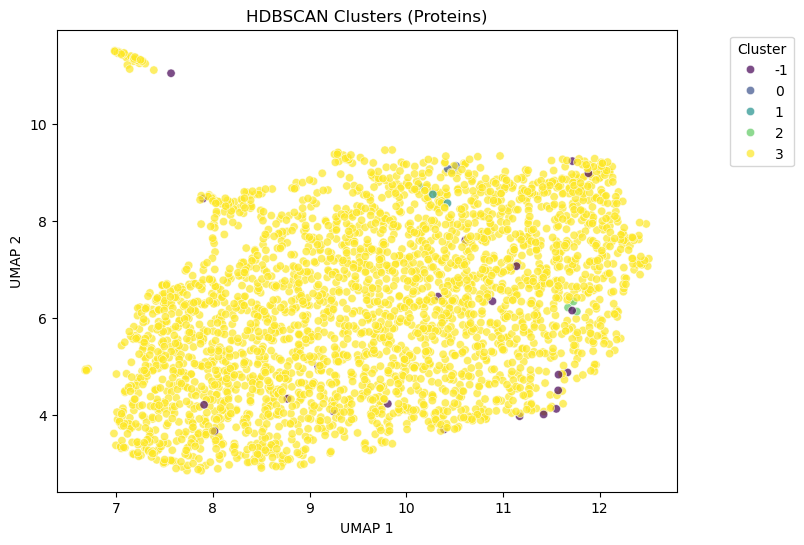

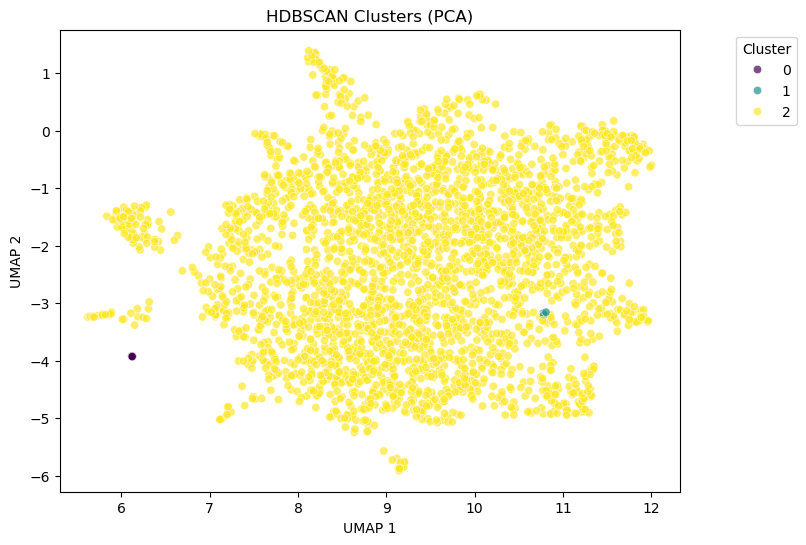

In [22]:
import umap

#protein data for 2D visualisation
umap_model_proteins = umap.UMAP(n_components=2, random_state=123)
umap_result_proteins = umap_model_proteins.fit_transform(df_hypertension_proteins_scaled)

#PCA data for 2D visualisation
umap_model_pca = umap.UMAP(n_components=2, random_state=123)
umap_result_pca = umap_model_pca.fit_transform(df_hypertension_pca_scaled)

#plot specifics 
def plot_clusters(embedding, cluster_labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=cluster_labels, palette='viridis', alpha=0.7)
    plt.title(title)
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.legend(title="Cluster", loc="upper right", bbox_to_anchor=(1.2, 1))
    plt.show()

#plot clusters for protein data

plot_clusters(umap_result_proteins,cluster_labels_proteins, "HDBSCAN Clusters (Proteins)")

#plot clusters for PCA data
plot_clusters(umap_result_pca, cluster_labels_pca, "HDBSCAN Clusters (PCA)")
